In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data=pd.read_csv('Pizza.csv')

In [55]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [56]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [57]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [59]:
data.describe()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [60]:
data['diameter']=data['diameter'].str.replace('inch','')

In [61]:
data['diameter'].astype(float)

0      22.0
1      20.0
2      16.0
3      14.0
4      18.0
       ... 
124     8.5
125    12.0
126    14.0
127     8.5
128    12.0
Name: diameter, Length: 129, dtype: float64

In [62]:
data['price']=data['price'].str.replace('Rp','')

In [63]:
data['price']=data['price'].str.replace(',','').astype(int)

In [64]:
data['price']

0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 129, dtype: int32

In [65]:
data['price'] = data['price'].round(1)

In [66]:
def convert(value):
   return value*0.0055

In [67]:
data['price']=data['price'].apply(convert)

In [68]:
data['price']

0      1292.5
1      1089.0
2       660.0
3       852.5
4      1364.0
        ...  
124     214.5
125     396.0
126     544.5
127     242.0
128     429.0
Name: price, Length: 129, dtype: float64

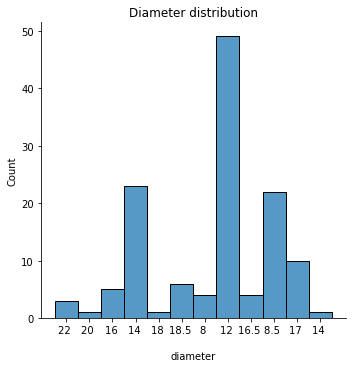

In [69]:
sns.displot(x='diameter', data=data, kde=False)
plt.title('Diameter distribution')
plt.show()

Diameter distribution in skewed right

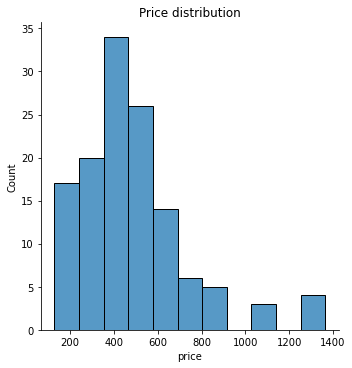

In [70]:
sns.displot(x='price', data=data)
plt.title('Price distribution')
plt.show()

The price distribition is right skewed as well

In [71]:
data['topping']
data['topping'] = data['topping'].replace('papperoni','pepperoni')
data['topping'] = data['topping'].replace('black_papper','black_pepper')

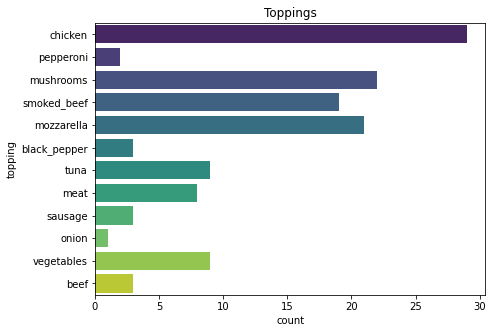

In [72]:
plt.figure(figsize=(7,5))
ax=sns.countplot(y='topping', data=data, palette='viridis');
plt.title('Toppings')
plt.show()

The most popular toppings among the pizzas are chicken, mushrooms, smoked_beef and mozzarella

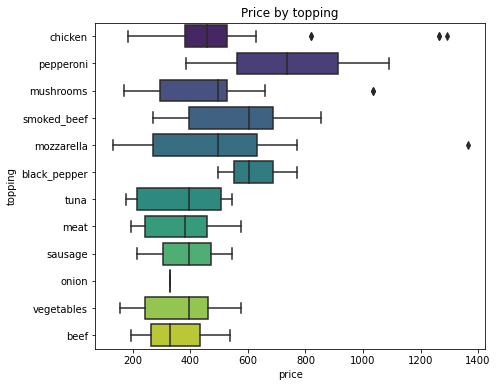

In [73]:
plt.figure(figsize=(7,6))
sns.boxplot(y='topping', x='price', data=data, palette='viridis')
plt.title('Price by topping')
plt.show()

In [74]:
data[data['topping']=='onion']

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
59,C,330.0,12,onion,extravaganza,medium,yes,yes,no


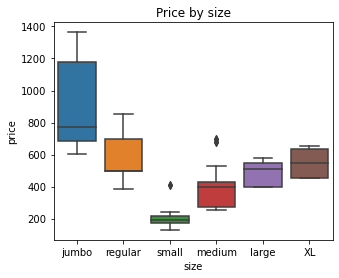

In [75]:
data['size'] = data['size'].replace('reguler','regular')

plt.figure(figsize=(5,4))
sns.boxplot(x='size', y='price', data=data)
plt.title('Price by size')
plt.show()


In [76]:
data.variant.value_counts()

classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: variant, dtype: int64

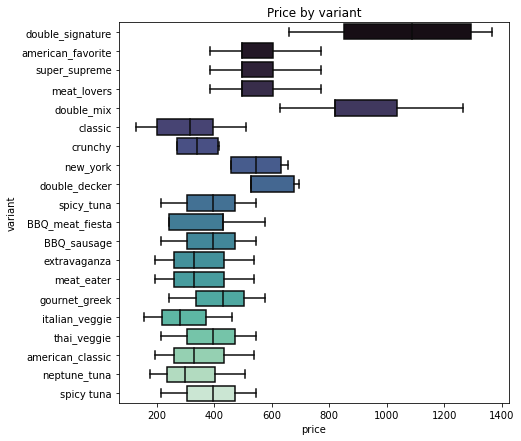

In [77]:
plt.figure(figsize=(7,7))
sns.boxplot(y='variant', x='price', data=data, palette='mako')
plt.title('Price by variant')
plt.show()

From this plot we can deduce that that:

Double signature and double mix pizzas are more expensive than the other pizzas.
In particular, double signature pizza date has a large variance.
Classic and italian veggies are cheaper on average.

**Topping Analysis**

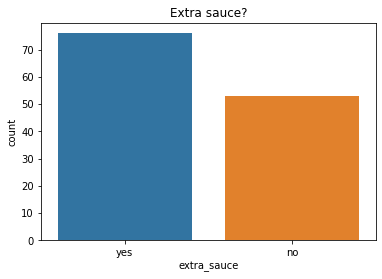

In [78]:
sns.countplot(x='extra_sauce', data=data)
plt.title('Extra sauce?')
plt.show()

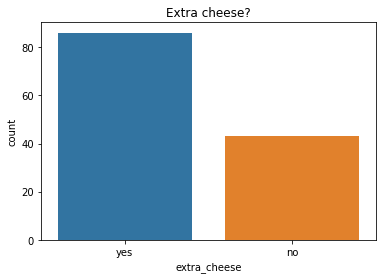

In [79]:
sns.countplot(x='extra_cheese', data=data)
plt.title('Extra cheese?')
plt.show()

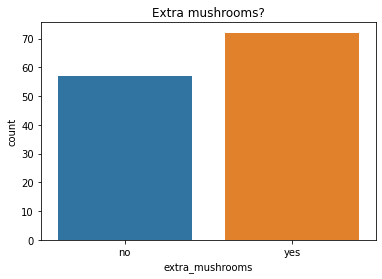

In [80]:
sns.countplot(x='extra_mushrooms', data=data)
plt.title('Extra mushrooms?')
plt.show()

 From this we can say that most pizzas have extra toppings (mushrooms, cheese and sauce)
In particular, the most added toppings is extra cheese

In [81]:
data.replace(('yes', 'no'), (1, 0), inplace=True)

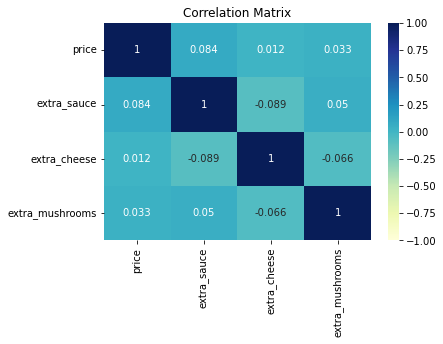

In [82]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1);
plt.title('Correlation Matrix');

It looks like that diameter is highly correlated with price, while other features does not seem to be correlated.

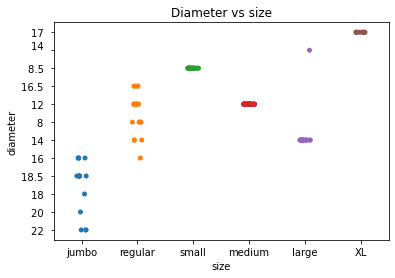

In [83]:
sns.stripplot(x='size', y='diameter', data=data)
plt.title('Diameter vs size')
plt.show()

Deductions:

Small pizza have a diameter of 8 inches
Medium pizza have a diameter of 12 inches
Large pizza have a diameter of 14 inches
XL pizza have a diameter of 17 inches

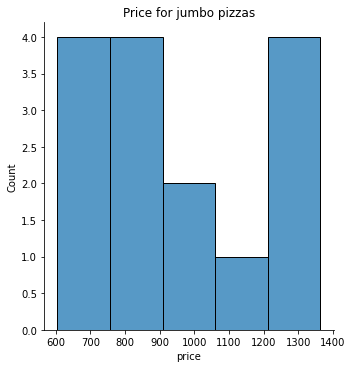

In [84]:
data_jumbo = data[data['size'] == 'jumbo']
data_jumbo.head()
sns.displot(x='price', data=data_jumbo)
plt.title('Price for jumbo pizzas')
plt.show()

The minimum price is 125000 rupiah, which is higher than the average price of all pizzas ( around 87000 rupiah)

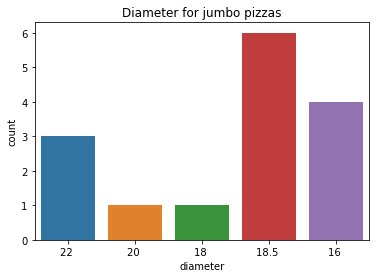

In [85]:
sns.countplot(x='diameter', data=data_jumbo)
plt.title('Diameter for jumbo pizzas')
plt.show()

Among jumbo pizzas, the diamater seems higher than 17 inches (XL size pizzas diameter).

Dropping Outliers

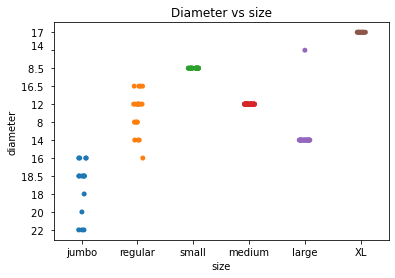

In [86]:
data = data.loc[~((data['size'] == 'jumbo') & (data['diameter'] == 16)),:]

sns.stripplot(x='size', y='diameter', data=data)
plt.title('Diameter vs size')
plt.show()

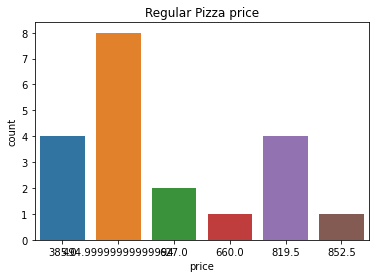

In [87]:
data_regular = data[data['size'] == 'regular']
data_regular.head()

sns.countplot(x='price', data=data_regular)
plt.title('Regular Pizza price')
plt.show()

Most regular pizza sems to have a price around 90000 rupiah, which is close to the overall average (87000)

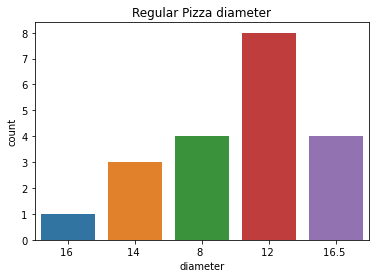

In [88]:
sns.countplot(x='diameter', data=data_regular)
plt.title('Regular Pizza diameter')
plt.show()

Most of regular pizza have a 12 inches diameter

In [89]:
data_regular.variant.value_counts()

meat_lovers          6
double_mix           6
american_favorite    3
super_supreme        3
double_signature     2
Name: variant, dtype: int64

The most popular variants are meat_lovers and double_mix.

In [90]:
data = data.loc[~(data['size'] == 'regular'),:]
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1292.5,22,chicken,double_signature,jumbo,1,1,0
1,A,1089.0,20,pepperoni,double_signature,jumbo,1,1,0
4,A,1364.0,18,mozzarella,double_signature,jumbo,1,0,1
5,A,770.0,18.5,black_pepper,american_favorite,jumbo,0,0,1
6,A,605.0,16,smoked_beef,american_favorite,jumbo,0,1,1


In [91]:
cat_cols=data.select_dtypes(include=['object']).columns

In [92]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1292.5,22,chicken,double_signature,jumbo,1,1,0
1,A,1089.0,20,pepperoni,double_signature,jumbo,1,1,0
4,A,1364.0,18,mozzarella,double_signature,jumbo,1,0,1
5,A,770.0,18.5,black_pepper,american_favorite,jumbo,0,0,1
6,A,605.0,16,smoked_beef,american_favorite,jumbo,0,1,1


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [95]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1292.5,8,2,8,1,1,1,0
1,0,1089.0,7,7,8,1,1,1,0
4,0,1364.0,5,4,8,1,1,0,1
5,0,770.0,6,1,3,1,0,0,1
6,0,605.0,3,9,3,1,0,1,1


In [96]:
X=data.drop('price',axis=1)
y=data['price']

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=37)

In [98]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1292.5,8,2,8,1,1,1,0
1,0,1089.0,7,7,8,1,1,1,0
4,0,1364.0,5,4,8,1,1,0,1
5,0,770.0,6,1,3,1,0,0,1
6,0,605.0,3,9,3,1,0,1,1


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [100]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [101]:
svm = SVR()
svm.fit(X_train,y_train)


SVR()

In [102]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [104]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)

In [105]:
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [106]:
print(score1,score2,score3,score4)

0.6234943817532048 -0.0853193897173481 0.9613517380806014 0.9214045402297768


In [107]:
final_data=pd.DataFrame({'Models':['LR','SVM','RF','GBR'],'R2SCORE':[score1,score2,score3,score4]})

<AxesSubplot:>

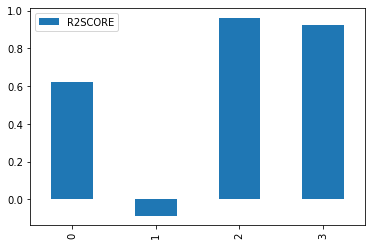

In [108]:
final_data.plot(kind='bar')

In [109]:
rf.feature_importances_

array([0.12782311, 0.21539403, 0.04660938, 0.13010331, 0.37827985,
       0.08897879, 0.00502244, 0.00778908])

In [110]:
fea=pd.Series(rf.feature_importances_,index=X_train.columns)

<AxesSubplot:>

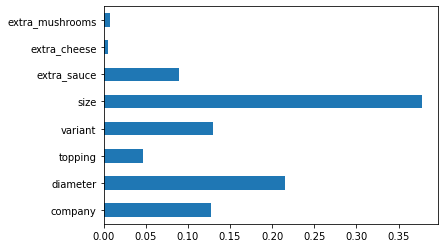

In [111]:
fea.plot(kind='barh')

In [112]:
gbr.feature_importances_

array([0.00248225, 0.21944961, 0.04676252, 0.1201683 , 0.49916158,
       0.10387629, 0.00293313, 0.00516633])

In [113]:
fea=pd.Series(gbr.feature_importances_,index=X_train.columns)

<AxesSubplot:>

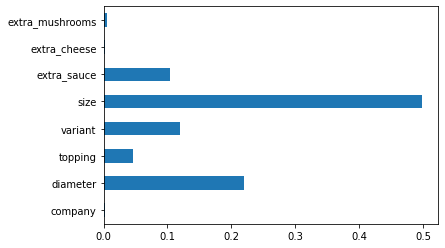

In [114]:
fea.plot(kind='barh')

In [115]:
X=data.drop('price',axis=1)
y=data['price']

In [116]:
rf=RandomForestRegressor()

In [117]:
rf.fit(X,y)

RandomForestRegressor()

In [118]:
import joblib


In [119]:
joblib.dump(rf,'Pizza_Price_Prediction')

['Pizza_Price_Prediction']

In [120]:
model=joblib.load('Pizza_Price_Prediction')

In [121]:
import pandas as pd
df=pd.DataFrame({
    'company':1,
    'diameter':18.0,
    'topping':2,
    'variant':6,
    'size':2,
    'extra_sauce':1,
    'extra_cheese':2,
    'extra_mushrooms':1,
  },index=[0])

In [122]:
df


,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,1,18.0,2,6,2,1,2,1


In [123]:
model.predict(df)

array([493.8175])